# INDEX :

1. simple math
2. what is deep learning vs ml
3. neuron vs perceptron
4. nn- feedforward pass and backward pass
5. activation functions
6. loss functions
7. optimizers

---
---

# simple math


1. Gradient Descent Core Math:
- Gradient (direction of steepest increase):
```math
∇f(x) = [∂f/∂x₁, ∂f/∂x₂, ..., ∂f/∂xₙ]
```
- Update Rule:
```math
x_{i+1} = x_i + α∇f(x_i)
```
where α is step size/learning rate

2. Neural Network Components:

A. Forward Propagation:
- Hidden Layer Computation:
```math
h_j = Σ(x_i * v_{ij})
a_j = g(h_j) = 1/(1 + e^(-βh_j))
```

- Output Layer:
```math
h_k = Σ(a_j * w_{jk})
y_k = g(h_k) = 1/(1 + e^(-βh_k))
```

B. Error Calculation:
- Output Error:
```math
δ_k = (t_k - y_k)y_k(1-y_k)
```
where t_k is target, y_k is prediction

C. Backpropagation:
- Hidden Layer Error:
```math
δ_{hj} = [Σ(w_{jk}δ_k)]a_j(1-a_j)
```

D. Weight Updates:
- Output Weights:
```math
w_{jk} ← w_{jk} - ηδ_ka_j
```
- Hidden Weights:
```math
v_{ij} ← v_{ij} - ηδ_{hj}x_i
```

3. With Momentum:
```math
w_{jk} ← w_{jk} - ηδ_ka_j + α∆w_{jk}^{t-1}
```
where:
- η = learning rate
- α = momentum coefficient
- ∆w_{jk}^{t-1} = previous weight change

Key English Points:
1. Process Flow:
   - Feed data forward through network
   - Calculate prediction error
   - Propagate error backward
   - Update weights
   - Repeat until error is small enough

2. Important Concepts:
   - Learning rate controls step size
   - Momentum helps avoid local minima
   - Activation functions add non-linearity
   - Chain rule enables backpropagation

3. Best Practices:
   - Initialize weights randomly
   - Shuffle training data
   - Use multiple starting points
   - Monitor convergence

4. Key Components:
   - Input Layer: Raw data
   - Hidden Layer: Feature extraction
   - Output Layer: Predictions
   - Weights: Learnable parameters
   - Activation Functions: Non-linear transformations

5. Advantages:
   - Can learn complex patterns
   - Automated feature learning
   - Flexible architecture
   - Universal approximation capability

This combination of mathematics and intuitive understanding is crucial for:
- Implementing the algorithm
- Debugging issues
- Optimizing performance
- Understanding behavior
 

# What is Deep Learning

***deep learning automate the processs of ridge and lasso in neurone with dead neurons kind of things and handling categorical values at one neuron.....most of the ml hyperparameter tuning is done by neurones like one step one step by one neurones***

Yes, that's a great way to conceptualize how deep learning works! In deep learning models, especially in neural networks, different neurons and layers can learn various types of representations and regularization techniques simultaneously.

In a neural network, each neuron specializes in detecting specific features of the input data by applying its own weights to the inputs received from the previous layer. During training, only the weights of neurons that significantly contribute to the prediction error are updated, allowing for selective learning. Neurons use activation functions to introduce non-linearity, determining whether to activate based on the weighted sum of inputs and bias. Early layers capture basic patterns, while deeper layers combine these patterns to recognize more complex structures, enhancing the model's generalization capabilities. This architecture enables deep learning models to effectively process and understand complex data.

ML: automation of statistics and Often requires manual feature engineering.ml works good with small data 
DL: automation of ml like Automatically learns features from raw data.dl works good with big data

DL architecture does require more data to leverage its full potential and avoid overfitting. ML models, being simpler, can often extract meaningful patterns from smaller datasets.
Parameter count:
DL models often have millions or billions of parameters, while traditional ML models might have hundreds or thousands.


---
---

## McCulloch and Pitts Neuron

In 1943, McCulloch and Pitts introduced a mathematical model of a neuron. It consisted of three components:

1. A set of **weights** $w_i$ corresponding to synapses (inputs)
2. An **adder** for summing input signals; analogous to cell membrane that collects charge
3. An **activation function** for determining when the neuron fires, based on accumulated input

The neuron model is shown schematically below. On the left are input nodes $\{x_i\}$, usually expressed as a vector. The strength with which the inputs are able to deliver the signal along the synapse is determined by their corresponding weights $\{w_i\}$. The adder then sums the inputs from all the synapses:

$$h = \sum_i w_i x_i$$

The parameter $\theta$ determines whether or not the neuron fires given a weighted input of $h$. If it fires, it returns a value $y=1$, otherwise $y=0$. For example, a simple **activation function** is using $\theta$ as a simple fixed threshold:

$$y = g(h) = \left\{ \begin{array}{l}
1, \text{if } h \gt \theta \\
0, \text{if } h \le \theta
\end{array} \right.$$

this activation function may take any of several forms, such as a logistic function.

![neuron](http://d.pr/i/9AMK+)

A single neuron is not interesting, nor useful, from a learning perspective. It cannot learn; it simply receives inputs and either fires or not. Only when neurons are joined as a **network** can they perform useful work.

Learning takes place by changing the weights of the connections in a neural network, and by changing the parameters of the activation functions of neurons.

## Perceptron

A collection of McCullough and Pitts neurons, along with a set of input nodes connected to the inputs via weighted edges, is a perceptron, the simplest neural network.

Each neuron is independent of the others in the perceptron, in the sense that its behavior and performance depends only on its own weights and threshold values, and not of those for the other neurons. Though they share inputs, they operate independently.

The number of inputs and outputs are determined by the data. Weights are stored as a `N x K` matrix, with N observations and K neurons, with $w_{ij}$ specifying the weight on the *i*th observation on the *j*th neuron.

![perceptron](http://d.pr/i/4IWA+)

In order to use the perceptron for statistical learning, we compare the outputs $y_j$ from each neuron to the obervation target $t_j$, and adjust the input weights when they do not correspond (*e.g.* if a neuron fires when it should not have).

$$t_j - y_j$$

We use this difference to update the weight $w_{ij}$, based on the input and a desired **learning rate**. This results in an update rule:

$$w_{ij} \leftarrow w_{ij} + \eta (t_j - y_j) x_i$$

After an incremental improvement, the perceptron is shown the training data again, resulting in another update. This is repeated until the performance no longer improves. Having a learning rate less than one results in a more stable learning rate, though this stability is traded off against having to expose the network to the data multiple times. Typical learning rates are in the 0.1-0.4 range.

An additional input node is typically added to the perceptron model, which is a constant value (usually -1, 0, or 1) that acts analogously to an intercept in a regression model. This establishes a baseline input for the case when all inputs are zero.

![bias](http://d.pr/i/105b5+)

## Learning with Perceptrons

1. Initialize weights $w_{ij}$ to small, random numbers.
2. For each t in T iterations
    * compute activation for each neuron *j* connected to each input vector *i*
    * update weights
    $$w_{ij} \leftarrow w_{ij} + \eta (t_j - y_j) x_i$$


This algorithm is $\mathcal{O}(Tmn)$

Example: Logical functions

Let's see how the perceptron learns by training it on a couple of of logical functions, AND and OR. For two variables `x1` and `x2`, the AND function returns 1 if both are true, or zero otherwise; the OR function returns 1 if either variable is true, or both. These functions can be expressed as simple lookup tables.

---
---

# Multi-layer Perceptron

The solution to fitting more complex (*i.e.* non-linear) models with neural networks is to use a more complex network that consists of more than just a single perceptron. The take-home message from the perceptron is that all of the learning happens by adapting the synapse weights until prediction is satisfactory. Hence, a reasonable guess at how to make a perceptron more complex is to simply **add more weights**.

There are two ways to add complexity:

1. Add backward connections, so that output neurons feed back to input nodes, resulting in a **recurrent network**
2. Add neurons between the input nodes and the outputs, creating an additional ("hidden") layer to the network, resulting in a **multi-layer perceptron**

The latter approach is more common in applications of neural networks.


How to train a multilayer network is not intuitive. Propagating the inputs forward over two layers is straightforward, since the outputs from the hidden layer can be used as inputs for the output layer. However, the process for updating the weights based on the prediction error is less clear, since it is difficult to know whether to change the weights on the input layer or on the hidden layer in order to improve the prediction.

Updating a multi-layer perceptron (MLP) is a matter of: 

1. moving forward through the network, calculating outputs given inputs and current weight estimates
2. moving backward updating weights according to the resulting error from forward propagation. 

In this sense, it is similar to a single-layer perceptron, except it has to be done twice, once for each layer.




# Backpropagation

Backpropagation is a method for efficiently computing the gradient of the cost function of a neural network with respect to its parameters.  These partial derivatives can then be used to update the network's parameters using, e.g., gradient descent.  This may be the most common method for training neural networks.  Deriving backpropagation involves numerous clever applications of the chain rule for functions of vectors. 


![bp](https://theclevermachine.files.wordpress.com/2014/09/neural-net.png)

## Review: The chain rule

The chain rule is a way to compute the derivative of a function whose variables are themselves functions of other variables.  If $C$ is a scalar-valued function of a scalar $z$ and $z$ is itself a scalar-valued function of another scalar variable $w$, then the chain rule states that
$$
\frac{\partial C}{\partial w} = \frac{\partial C}{\partial z}\frac{\partial z}{\partial w}
$$
For scalar-valued functions of more than one variable, the chain rule essentially becomes additive.  In other words, if $C$ is a scalar-valued function of $N$ variables $z_1, \ldots, z_N$, each of which is a function of some variable $w$, the chain rule states that
$$
\frac{\partial C}{\partial w} = \sum_{i = 1}^N \frac{\partial C}{\partial z_i}\frac{\partial z_i}{\partial w}
$$

## Notation

In the following derivation, we'll use the following notation:

$L$ - Number of layers in the network.

$N^n$ - Dimensionality of layer $n \in \{0, \ldots, L\}$.  $N^0$ is the dimensionality of the input; $N^L$ is the dimensionality of the output.

$W^m \in \mathbb{R}^{N^m \times N^{m - 1}}$ - Weight matrix for layer $m \in \{1, \ldots, L\}$.  $W^m_{ij}$ is the weight between the $i^{th}$ unit in layer $m$ and the $j^{th}$ unit in layer $m - 1$.

$b^m \in \mathbb{R}^{N^m}$ - Bias vector for layer $m$.

$\sigma^m$ - Nonlinear activation function of the units in layer $m$, applied elementwise.

$z^m \in \mathbb{R}^{N^m}$ - Linear mix of the inputs to layer $m$, computed by $z^m = W^m a^{m - 1} + b^m$.

$a^m \in \mathbb{R}^{N^m}$ - Activation of units in layer $m$, computed by $a^m = \sigma^m(h^m) = \sigma^m(W^m a^{m - 1} + b^m)$.  $a^L$ is the output of the network.  We define the special case $a^0$ as the input of the network.

$y \in \mathbb{R}^{N^L}$ - Target output of the network.

$C$ - Cost/error function of the network, which is a function of $a^L$ (the network output) and $y$ (treated as a constant).

## Backpropagation in general

In order to train the network using a gradient descent algorithm, we need to know the gradient of each of the parameters with respect to the cost/error function $C$; that is, we need to know $\frac{\partial C}{\partial W^m}$ and $\frac{\partial C}{\partial b^m}$.  It will be sufficient to derive an expression for these gradients in terms of the following terms, which we can compute based on the neural network's architecture:

- $\frac{\partial C}{\partial a^L}$: The derivative of the cost function with respect to its argument, the output of the network
- $\frac{\partial a^m}{\partial z^m}$: The derivative of the nonlinearity used in layer $m$ with respect to its argument

To compute the gradient of our cost/error function $C$ to $W^m_{ij}$ (a single entry in the weight matrix of the layer $m$), we can first note that $C$ is a function of $a^L$, which is itself a function of the linear mix variables $z^m_k$, which are themselves functions of the weight matrices $W^m$ and biases $b^m$.  With this in mind, we can use the chain rule as follows:

$$\frac{\partial C}{\partial W^m_{ij}} = \sum_{k = 1}^{N^m} \frac{\partial C}{\partial z^m_k} \frac{\partial z^m_k}{\partial W^m_{ij}}$$

Note that by definition 
$$
z^m_k = \sum_{l = 1}^{N^m} W^m_{kl} a_l^{m - 1} + b^m_k
$$
It follows that $\frac{\partial z^m_k}{\partial W^m_{ij}}$ will evaluate to zero when $i \ne k$ because $z^m_k$ does not interact with any elements in $W^m$ except for those in the $k$<sup>th</sup> row, and we are only considering the entry $W^m_{ij}$.  When $i = k$, we have

\begin{align*}
\frac{\partial z^m_i}{\partial W^m_{ij}} &= \frac{\partial}{\partial W^m_{ij}}\left(\sum_{l = 1}^{N^m} W^m_{il} a_l^{m - 1} + b^m_i\right)\\
&= a^{m - 1}_j\\
\rightarrow \frac{\partial z^m_k}{\partial W^m_{ij}} &= \begin{cases}
0 & k \ne i\\
a^{m - 1}_j & k = i
\end{cases}
\end{align*}

The fact that $\frac{\partial C}{\partial a^m_k}$ is $0$ unless $k = i$ causes the summation above to collapse, giving

$$\frac{\partial C}{\partial W^m_{ij}} = \frac{\partial C}{\partial z^m_i} a^{m - 1}_j$$

or in vector form

$$\frac{\partial C}{\partial W^m} = \frac{\partial C}{\partial z^m} a^{m - 1 \top}$$

---
---

Similarly for the bias variables $b^m$, we have

$$\frac{\partial C}{\partial b^m_i} = \sum_{k = 1}^{N^m} \frac{\partial C}{\partial z^m_k} \frac{\partial z^m_k}{\partial b^m_i}$$

As above, it follows that $\frac{\partial z^m_k}{\partial b^m_i}$ will evaluate to zero when $i \ne k$ because $z^m_k$ does not interact with any element in $b^m$ except $b^m_k$.  When $i = k$, we have

\begin{align*}
\frac{\partial z^m_i}{\partial b^m_i} &= \frac{\partial}{\partial b^m_i}\left(\sum_{l = 1}^{N^m} W^m_{il} a_l^{m - 1} + b^m_i\right)\\
&= 1\\
\rightarrow \frac{\partial z^m_i}{\partial b^m_i} &= \begin{cases}
0 & k \ne i\\
1 & k = i
\end{cases}
\end{align*}

The summation also collapses to give

$$\frac{\partial C}{\partial b^m_i} = \frac{\partial C}{\partial z^m_i}$$

or in vector form

$$\frac{\partial C}{\partial b^m} = \frac{\partial C}{\partial z^m}$$

---
---

Now, we must compute $\frac{\partial C}{\partial z^m_k}$.  For the final layer ($m = L$), this term is straightforward to compute using the chain rule:

$$
\frac{\partial C}{\partial z^L_k} = \frac{\partial C}{\partial a^L_k} \frac{\partial a^L_k}{\partial z^L_k}
$$

or, in vector form

$$
\frac{\partial C}{\partial z^L} = \frac{\partial C}{\partial a^L} \frac{\partial a^L}{\partial z^L}
$$

The first term $\frac{\partial C}{\partial a^L}$ is just the derivative of the cost function with respect to its argument, whose form depends on the cost function chosen.  Similarly, $\frac{\partial a^m}{\partial z^m}$ (for any layer $m$ includling $L$) is the derivative of the layer's nonlinearity with respect to its argument and will depend on the choice of nonlinearity.  For other layers, we again invoke the chain rule:


\begin{align*}
\frac{\partial C}{\partial z^m_k} &= \frac{\partial C}{\partial a^m_k} \frac{\partial a^m_k}{\partial z^m_k}\\
&= \left(\sum_{l = 1}^{N^{m + 1}}\frac{\partial C}{\partial z^{m + 1}_l}\frac{\partial z^{m + 1}_l}{\partial a^m_k}\right)\frac{\partial a^m_k}{\partial z^m_k}\\
&= \left(\sum_{l = 1}^{N^{m + 1}}\frac{\partial C}{\partial z^{m + 1}_l}\frac{\partial}{\partial a^m_k} \left(\sum_{h = 1}^{N^m} W^{m + 1}_{lh} a_h^m + b_l^{m + 1}\right)\right) \frac{\partial a^m_k}{\partial z^m_k}\\
&= \left(\sum_{l = 1}^{N^{m + 1}}\frac{\partial C}{\partial z^{m + 1}_l} W^{m + 1}_{lk}\right) \frac{\partial a^m_k}{\partial z^m_k}\\
&= \left(\sum_{l = 1}^{N^{m + 1}}W^{m + 1\top}_{kl} \frac{\partial C}{\partial z^{m + 1}_l}\right) \frac{\partial a^m_k}{\partial z^m_k}\\
\end{align*}

where the last simplification was made because by convention $\frac{\partial C}{\partial z^{m + 1}_l}$ is a column vector, allowing us to write the following vector form:

$$\frac{\partial C}{\partial z^m} = \left(W^{m + 1\top} \frac{\partial C}{\partial z^{m + 1}}\right) \circ \frac{\partial a^m}{\partial z^m}$$
---

### $W^{m + 1\top}$ is weight of previous layer from backward perspective...so it considers previous weights to and similarly for bias too........

---
Note that we now have the ingredients to efficiently compute the gradient of the cost function with respect to the network's parameters:  First, we compute $\frac{\partial C}{\partial z^L_k}$ based on the choice of cost function and nonlinearity.  Then, we recursively can compute $\frac{\partial C}{\partial z^m}$ layer-by-layer based on the term $\frac{\partial C}{\partial z^{m + 1}}$ computed from the previous layer and the nonlinearity of the layer (this is called the "backward pass").

- In both cases, the update process occurs simultaneously during backpropagation. However, weights benefit from the interactions with input data and previous states, while biases are treated as independent adjustments to the neuron's output. The combined effect of these updates helps the neural network learn effectively.

- and on bias previous weight is also considered because of dc/dz

## Backpropagation in practice

As discussed above, the exact form of the updates depends on both the chosen cost function and each layer's chosen nonlinearity.  The following two table lists the some common choices for nonlinearities and the required partial derivative for deriving the gradient for each layer:

| Nonlinearity | $a^m = \sigma^m(z^m)$ | $\frac{\partial a^m}{\partial z^m}$ | Notes |
|--------------|---|---|---|
| Sigmoid      | $\frac{1}{1 + e^{z^m}}$ | $\sigma^m(z^m)(1 - \sigma^m(z^m)) = a^m(1 - a^m)$ | "Squashes" any input to the range $[0, 1]$ |
| Tanh         | $\frac{e^{z^m} - e^{-z^m}}{e^{z^m} + e^{-z^m}}$ | $1 - (\sigma^m(z^m))^2 = 1 - (a^m)^2$ | Equivalent, up to scaling, to the sigmoid function |
| ReLU         | $\max(0, z^m)$ | $0, z^m < 0;\; 1, z^m \ge 0$ | Commonly used in neural networks with many layers|

Similarly, the following table collects some common cost functions and the partial derivative needed to compute the gradient for the final layer:

| Cost Function | $C$                                  | $\frac{\partial C}{\partial a^L}$ | Notes |
|---------------|--------------------------------------|-----------------------------------|---|
| Squared Error | $\frac{1}{2}(y - a^L)^\top(y - a^L)$ | $y - a^L$                         | Commonly used when the output is not constrained to a specific range |
| Cross-Entropy | $(y - 1)\log(1 - a^L) - y\log(a^L)$  | $\frac{a^L - y}{a^L(1 - a^L)}$    | Commonly used for binary classification tasks; can yield faster convergence |

In practice, backpropagation proceeds in the following manner for each training sample:

1. Forward pass: Given the network input $a^0$, compute $a^m$ recursively by
 $$a^1 = \sigma^1(W^1 a^0 + b^1), \ldots, a^L = \sigma^L(W^L a^{L - 1} + b^L)$$
1. Backward pass: Compute 
$$\frac{\partial C}{\partial z^L} = \frac{\partial C}{\partial a^L} \frac{\partial a^L}{\partial z^L}$$
for the final layer based on the tables above, then recursively compute
$$\frac{\partial C}{\partial z^m} = \left(W^{m + 1\top} \frac{\partial C}{\partial z^{m + 1}}\right) \circ \frac{\partial a^m}{\partial z^m}$$
for all other layers.  Plug these values into 
$$\frac{\partial C}{\partial W^m} = \frac{\partial C}{\partial z^m_i} a^{m - 1 \top}$$
and
$$\frac{\partial C}{\partial b^m} = \frac{\partial C}{\partial z^m}$$
to obtain the updates.

---
---

### Example: Sigmoid network with cross-entropy loss using gradient descent

A common network architecture is one with fully connected layers where each layer's nonlinearity is the sigmoid function $a^m = \frac{1}{1 + e^{z^m}}$ and the cost function is the cross-entropy loss $(y - 1)\log(1 - a^L) - y\log(a^L)$.  To compute the updates for gradient descent, we first compute (based on the tables above)
\begin{align*}
\frac{\partial C}{\partial z^L} &= \frac{\partial C}{\partial a^L} \frac{\partial a^L}{\partial z^L}\\
&= \left(\frac{a^L - y}{a^L(1 - a^L)}\right)a^L(1 - a^L)\\
&= a^L - y
\end{align*}
From here, we can compute
\begin{align*}
\frac{\partial C}{\partial z^{L - 1}} &= \left(W^{L\top} \frac{\partial C}{\partial z^L} \right) \circ \frac{\partial a^{L - 1}}{\partial z^{L - 1}}\\
&= W^{L\top} (a^L - y) \circ a^{L - 1}(1 - a^{L - 1})\\
\frac{\partial C}{\partial z^{L - 2}} &= \left(W^{L - 1\top} \frac{\partial C}{\partial z^{L - 1}} \right) \circ \frac{\partial a^{L - 2}}{\partial z^{L - 2}}\\
&= W^{L - 1\top} \left(W^{L\top} (a^L - y) \circ a^{L - 1}(1 - a^{L - 1})\right) \circ a^{L - 2}(1 - a^{L - 2})
\end{align*}
and so on, until we have computed $\frac{\partial C}{\partial z^m}$ for $m \in \{1, \ldots, L\}$.  This allows us to compute  $\frac{\partial C}{\partial W^m_{ij}}$ and $\frac{\partial C}{\partial b^m_i}$, e.g.
\begin{align*}
\frac{\partial C}{\partial W^L} &= \frac{\partial C}{\partial z^L} a^{L - 1 \top}\\
&= (a^L - y)a^{L - 1\top}\\
\frac{\partial C}{\partial W^{L - 1}} &= \frac{\partial C}{\partial z^{L - 1}} a^{L - 2 \top}\\
&= W^{L\top} (a^L - y) \circ a^{L - 1}(1 - a^{L - 1}) a^{L - 2\top}
\end{align*}
and so on.  Standard gradient descent then updates each parameter as follows:
$$W^m = W^m - \lambda \frac{\partial C}{\partial W^m}$$
$$b^m = b^m - \lambda \frac{\partial C}{\partial b^m}$$
where $\lambda$ is the learning rate.  This process is repeated until some stopping criteria is met.

---
---

## Backpropagation in practice

As discussed above, the exact form of the updates depends on both the chosen cost function and each layer's chosen nonlinearity.  The following two table lists the some common choices for nonlinearities and the required partial derivative for deriving the gradient for each layer:

| Nonlinearity | $a^m = \sigma^m(z^m)$ | $\frac{\partial a^m}{\partial z^m}$ | Notes |
|--------------|---|---|---|
| Sigmoid      | $\frac{1}{1 + e^{z^m}}$ | $\sigma^m(z^m)(1 - \sigma^m(z^m)) = a^m(1 - a^m)$ | "Squashes" any input to the range $[0, 1]$ |
| Tanh         | $\frac{e^{z^m} - e^{-z^m}}{e^{z^m} + e^{-z^m}}$ | $1 - (\sigma^m(z^m))^2 = 1 - (a^m)^2$ | Equivalent, up to scaling, to the sigmoid function |
| ReLU         | $\max(0, z^m)$ | $0, z^m < 0;\; 1, z^m \ge 0$ | Commonly used in neural networks with many layers|

Similarly, the following table collects some common cost functions and the partial derivative needed to compute the gradient for the final layer:

| Cost Function | $C$                                  | $\frac{\partial C}{\partial a^L}$ | Notes |
|---------------|--------------------------------------|-----------------------------------|---|
| Squared Error | $\frac{1}{2}(y - a^L)^\top(y - a^L)$ | $y - a^L$                         | Commonly used when the output is not constrained to a specific range |
| Cross-Entropy | $(y - 1)\log(1 - a^L) - y\log(a^L)$  | $\frac{a^L - y}{a^L(1 - a^L)}$    | Commonly used for binary classification tasks; can yield faster convergence |

In practice, backpropagation proceeds in the following manner for each training sample:

1. Forward pass: Given the network input $a^0$, compute $a^m$ recursively by
 $$a^1 = \sigma^1(W^1 a^0 + b^1), \ldots, a^L = \sigma^L(W^L a^{L - 1} + b^L)$$
1. Backward pass: Compute 
$$\frac{\partial C}{\partial z^L} = \frac{\partial C}{\partial a^L} \frac{\partial a^L}{\partial z^L}$$
for the final layer based on the tables above, then recursively compute
$$\frac{\partial C}{\partial z^m} = \left(W^{m + 1\top} \frac{\partial C}{\partial z^{m + 1}}\right) \circ \frac{\partial a^m}{\partial z^m}$$
for all other layers.  Plug these values into 
$$\frac{\partial C}{\partial W^m} = \frac{\partial C}{\partial z^m_i} a^{m - 1 \top}$$
and
$$\frac{\partial C}{\partial b^m} = \frac{\partial C}{\partial z^m}$$
to obtain the updates.

---
---

### Example: Sigmoid network with cross-entropy loss using gradient descent

A common network architecture is one with fully connected layers where each layer's nonlinearity is the sigmoid function $a^m = \frac{1}{1 + e^{z^m}}$ and the cost function is the cross-entropy loss $(y - 1)\log(1 - a^L) - y\log(a^L)$.  To compute the updates for gradient descent, we first compute (based on the tables above)
\begin{align*}
\frac{\partial C}{\partial z^L} &= \frac{\partial C}{\partial a^L} \frac{\partial a^L}{\partial z^L}\\
&= \left(\frac{a^L - y}{a^L(1 - a^L)}\right)a^L(1 - a^L)\\
&= a^L - y
\end{align*}
From here, we can compute
\begin{align*}
\frac{\partial C}{\partial z^{L - 1}} &= \left(W^{L\top} \frac{\partial C}{\partial z^L} \right) \circ \frac{\partial a^{L - 1}}{\partial z^{L - 1}}\\
&= W^{L\top} (a^L - y) \circ a^{L - 1}(1 - a^{L - 1})\\
\frac{\partial C}{\partial z^{L - 2}} &= \left(W^{L - 1\top} \frac{\partial C}{\partial z^{L - 1}} \right) \circ \frac{\partial a^{L - 2}}{\partial z^{L - 2}}\\
&= W^{L - 1\top} \left(W^{L\top} (a^L - y) \circ a^{L - 1}(1 - a^{L - 1})\right) \circ a^{L - 2}(1 - a^{L - 2})
\end{align*}
and so on, until we have computed $\frac{\partial C}{\partial z^m}$ for $m \in \{1, \ldots, L\}$.  This allows us to compute  $\frac{\partial C}{\partial W^m_{ij}}$ and $\frac{\partial C}{\partial b^m_i}$, e.g.
\begin{align*}
\frac{\partial C}{\partial W^L} &= \frac{\partial C}{\partial z^L} a^{L - 1 \top}\\
&= (a^L - y)a^{L - 1\top}\\
\frac{\partial C}{\partial W^{L - 1}} &= \frac{\partial C}{\partial z^{L - 1}} a^{L - 2 \top}\\
&= W^{L\top} (a^L - y) \circ a^{L - 1}(1 - a^{L - 1}) a^{L - 2\top}
\end{align*}
and so on.  Standard gradient descent then updates each parameter as follows:
$$W^m = W^m - \lambda \frac{\partial C}{\partial W^m}$$
$$b^m = b^m - \lambda \frac{\partial C}{\partial b^m}$$
where $\lambda$ is the learning rate.  This process is repeated until some stopping criteria is met.


---
---

# Neural Network Forward and Backward Propagation

## Network Architecture
- **Input Layer (Layer 1)**: 2 neurons
- **Hidden Layer (Layer 2)**: 2 neurons
- **Output Layer (Layer 3)**: 1 neuron
- **Activation Function**: Sigmoid function $$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

## Data
| **Input** $$ (x_1, x_2) $$ | **Target Output** $$ (y) $$ |
|-----------------------------|-----------------------------|
| (0.5, 0.8)                  | 1                           |

## Initial Weights and Biases
- **Weights from Input to Hidden Layer** $$ W^1 $$:
$$
W^1 = \begin{pmatrix}
0.2 & 0.4 \\
0.3 & 0.7
\end{pmatrix}
$$
- **Biases for Hidden Layer** $$ b^1 $$:
$$
b^1 = \begin{pmatrix}
0.1 \\
0.2
\end{pmatrix}
$$
- **Weights from Hidden Layer to Output Layer** $$ W^2 $$:
$$
W^2 = \begin{pmatrix}
0.5 \\
0.6
\end{pmatrix}
$$
- **Bias for Output Layer** $$ b^2 = 0.3 $$

---

## Step 1: Forward Propagation

### 1.1. Pre-activation $$ z^2 $$ for Hidden Layer
$$
z^2 = W^1 x + b^1
$$
$$
z^2 = \begin{pmatrix} 0.2 & 0.4 \\ 0.3 & 0.7 \end{pmatrix} \begin{pmatrix} 0.5 \\ 0.8 \end{pmatrix} + \begin{pmatrix} 0.1 \\ 0.2 \end{pmatrix}
$$
$$
z^2_1 = 0.2 \cdot 0.5 + 0.4 \cdot 0.8 + 0.1 = 0.52
$$
$$
z^2_2 = 0.3 \cdot 0.5 + 0.7 \cdot 0.8 + 0.2 = 0.91
$$
$$
z^2 = \begin{pmatrix} 0.52 \\ 0.91 \end{pmatrix}
$$

### 1.2. Activation $$ a^2 $$ for Hidden Layer
$$
a^2 = \sigma(z^2) = \frac{1}{1 + e^{-z^2}}
$$
$$
a^2_1 = \frac{1}{1 + e^{-0.52}} \approx 0.627
$$
$$
a^2_2 = \frac{1}{1 + e^{-0.91}} \approx 0.713
$$
$$
a^2 = \begin{pmatrix} 0.627 \\ 0.713 \end{pmatrix}
$$

### 1.3. Pre-activation $$ z^3 $$ for Output Layer
$$
z^3 = W^2 a^2 + b^2
$$
$$
z^3 = \begin{pmatrix} 0.5 & 0.6 \end{pmatrix} \begin{pmatrix} 0.627 \\ 0.713 \end{pmatrix} + 0.3
$$
$$
z^3 = 0.5 \cdot 0.627 + 0.6 \cdot 0.713 + 0.3 = 1.0413
$$

### 1.4. Activation $$ a^3 $$ for Output Layer
$$
a^3 = \sigma(z^3) = \frac{1}{1 + e^{-1.0413}} \approx 0.739
$$
$$
\hat{y} = a^3 = 0.739
$$

---

## Step 2: Backpropagation

### 2.1. Error at Output Layer
The cost function $$ J $$ (MSE):
$$
J = \frac{1}{2} (y - \hat{y})^2
$$
$$
J = \frac{1}{2} (1 - 0.739)^2 = 0.03406
$$

Now, compute the gradient $$ \frac{\partial J}{\partial z^3} $$:
$$
\frac{\partial J}{\partial z^3} = (a^3 - y) \cdot \sigma'(z^3)
$$
$$
\sigma'(z^3) = a^3(1 - a^3)
$$
$$
\sigma'(1.0413) = 0.739 \cdot (1 - 0.739) = 0.1929
$$
$$
\frac{\partial J}{\partial z^3} = (0.739 - 1) \cdot 0.1929 = -0.0503
$$

### 2.2. Gradient for $$ W^2 $$ and $$ b^2 $$
$$
\frac{\partial J}{\partial W^2} = \frac{\partial J}{\partial z^3} \cdot (a^2)^T
$$
$$
\frac{\partial J}{\partial W^2_1} = -0.0503 \cdot 0.627 = -0.03155
$$
$$
\frac{\partial J}{\partial W^2_2} = -0.0503 \cdot 0.713 = -0.03587
$$
$$
\frac{\partial J}{\partial W^2} = \begin{pmatrix} -0.03155 \\ -0.03587 \end{pmatrix}
$$
For the bias:
$$
\frac{\partial J}{\partial b^2} = \frac{\partial J}{\partial z^3} = -0.0503
$$

### 2.3. Backpropagate to Hidden Layer
$$
\frac{\partial J}{\partial z^2} = \left( W^2 \right)^T \cdot \frac{\partial J}{\partial z^3} \cdot \sigma'(z^2)
$$
$$
\left( W^2 \right)^T = \begin{pmatrix} 0.5 \\ 0.6 \end{pmatrix}
$$
$$
\frac{\partial J}{\partial z^2} = \begin{pmatrix} 0.5 \\ 0.6 \end{pmatrix} \cdot -0.0503 = \begin{pmatrix} -0.02515 \\ -0.03018 \end{pmatrix}
$$

Now compute $$ \sigma'(z^2) $$:
$$
\sigma'(z^2_1) = 0.627 \cdot (1 - 0.627) = 0.2339
$$
$$
\sigma'(z^2_2) = 0.713 \cdot (1 - 0.713) = 0.2047
$$

Thus:
$$
\frac{\partial J}{\partial z^2_1} = -0.02515 \cdot 0.2339 = -0.00588
$$
$$
\frac{\partial J}{\partial z^2_2} = -0.03018 \cdot 0.2047 = -0.00617
$$
$$
\frac{\partial J}{\partial z^2} = \begin{pmatrix} -0.00588 \\ -0.00617 \end{pmatrix}
$$

### 2.4. Gradient for $$ W^1 $$ and $$ b^1 $$
$$
\frac{\partial J}{\partial W^1} = \frac{\partial J}{\partial z^2} \cdot (x)^T
$$
$$
\frac{\partial J}{\partial W^1_1} = -0.00588 \cdot 0.5 = -0.00294
$$
$$
\frac{\partial J}{\partial W^1_2} = -0.00617 \cdot 0.5 = -0.00308
$$
For the bias:
$$
\frac{\partial J}{\partial b^1_1} = -0.00588, \quad \frac{\partial J}{\partial b^1_2} = -0.00617
$$

---

### Summary of Gradient Updates:
- **$ \Delta W^2 $**: $ \begin{pmatrix} -0.03155 \\ -0.03587 \end{pmatrix} $  
- **$ \Delta b^2 $**: $ -0.0503 $  
- **$ \Delta W^1 $**: $ \begin{pmatrix} -0.00294 \\ -0.00308 \end{pmatrix} $ 
- **$ \Delta b^1 $**: $ \begin{pmatrix} -0.00588 \\ -0.00617 \end{pmatrix} $ 

 


---
---

# Activation Functions: Comparison Table

| Function | Equation | Derivative | Use Cases | Advantages | Disadvantages |
|----------|----------|------------|-----------|------------|---------------|
| Sigmoid | σ(x) = 1 / (1 + e^(-x)) | σ'(x) = σ(x) * (1 - σ(x)) | - Binary classification<br>- Hidden layers (historically) | - Smooth gradient<br>- Output between 0 and 1 | - Vanishing gradient problem<br>- Not zero-centered<br>- Computationally expensive |
| Tanh | tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x)) | tanh'(x) = 1 - tanh^2(x) | - Hidden layers | - Zero-centered<br>- Stronger gradients than sigmoid | - Still suffers from vanishing gradient problem |
| ReLU | f(x) = max(0, x) | f'(x) = { 0 for x < 0<br>1 for x ≥ 0 | - Hidden layers<br>- CNN | - Computationally efficient<br>- Alleviates vanishing gradient<br>- ReLU activates only the neurons with positive inputs, leading to sparse activations that enhance learning efficiency while potentially causing the "dying ReLU" problem. | - "Dying ReLU" problem<br>- Not zero-centered |
| Leaky ReLU | f(x) = { αx for x < 0<br>x for x ≥ 0 | f'(x) = { α for x < 0<br>1 for x ≥ 0 | - Hidden layers | - Zero-centered<br>- Prevents dying ReLU problem<br>- Negative inputs can have non-zero gradients | - Inconsistent results for negative inputs |
| ELU | f(x) = { α(e^x - 1) for x < 0<br>x for x ≥ 0 | f'(x) = { α * e^x for x < 0<br>1 for x ≥ 0 | - Hidden layers | - Smooth function<br>- Handles negative inputs well | - Computationally more expensive than ReLU |
| Softmax | σ(z)_i = e^(z_i) / Σ(e^(z_j)) | ∂σ(z)_i / ∂z_j = { σ(z)_i * (1 - σ(z)_i) if i = j<br>-σ(z)_i * σ(z)_j if i ≠ j | - Output layer for multi-class classification | - Outputs sum to 1<br>- Useful for probability distribution | - Computationally expensive<br>- Can cause exploding gradients |
| Argmax | argmax_i(x_i) = index of max value in x | Not differentiable | - Final decision in classification | - Simple decision rule | - Not differentiable<br>- Loses probability information |
| PReLU | f(x) = { αx for x < 0<br>x for x ≥ 0 | f'(x) = { α for x < 0<br>1 for x ≥ 0 | - Hidden layers | - Learns the optimal slope for negative inputs | - Can overfit on small datasets |
| Swish | f(x) = x * sigmoid(βx) | f'(x) = βf(x) + sigmoid(βx)(1 - βf(x)) | - Hidden layers | - Non-monotonic<br>- Smooth function | - Computationally expensive |
| Maxout | f(x) = max(w1^T x + b1, w2^T x + b2, ...) | Piecewise linear | - Hidden layers | - Generalizes ReLU and Leaky ReLU<br>- Does not have zero saturation | - Doubles the number of parameters |
| Softplus | f(x) = ln(1 + e^x) | f'(x) = 1 / (1 + e^(-x)) | - Hidden layers | - Smooth version of ReLU<br>- Always positive output | - Computationally expensive<br>- Can suffer from vanishing gradient |



# Loss functions:

| Loss Function | Equation | Use Cases | Advantages | Disadvantages |
|---------------|----------|-----------|------------|---------------|
| L1 Loss (Mean Absolute Error) | $L = \frac{1}{n}\sum_{i=1}^n \|y_i - \hat{y}_i\|$ | Regression | - Robust to outliers<br>- Computationally efficient | - Not differentiable at zero<br>- Can lead to multiple solutions |
| L2 Loss (Mean Squared Error) | $L = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$ | Regression | - Differentiable everywhere<br>- Unique solution<br>- Penalizes large errors more | - Sensitive to outliers |
| Huber Loss | $L = \begin{cases} \frac{1}{2}(y - \hat{y})^2 & \text{for } \|y - \hat{y}\| \leq \delta \\ \delta(\|y - \hat{y}\| - \frac{1}{2}\delta) & \text{otherwise} \end{cases}$ | Regression | - Combines benefits of L1 and L2<br>- Less sensitive to outliers than L2 | - Requires tuning of δ parameter |
| Hinge Loss | $L = \max(0, 1 - y \cdot \hat{y})$ | Binary Classification (e.g., SVM) | - Maximizes margin<br>- Works well for linearly separable data | - Not probabilistic<br>- Only for binary classification |
| Cross-entropy Loss | $L = -\sum_{i=1}^n y_i \log(\hat{y}_i)$ | Multi-class Classification | - Suitable for multi-class problems<br>- Provides probabilistic output | - Can be sensitive to class imbalance |
| Sigmoid Cross-entropy Loss | $L = -y \log(\sigma(\hat{y})) - (1-y) \log(1-\sigma(\hat{y}))$ | Binary Classification | - Provides probabilistic output<br>- Suitable for binary classification | - Can suffer from vanishing gradients |
| Softmax Cross-entropy Loss | $L = -\sum_{i=1}^n y_i \log(\frac{e^{\hat{y}_i}}{\sum_{j=1}^n e^{\hat{y}_j}})$ | Multi-class Classification | - Normalizes output to probabilities<br>- Handles multi-class problems well | - Computationally expensive for large number of classes |
| Adaptive Loss | $L = \frac{\|x\|^p}{p}$ where $p = 2 - 2/(1 + (x/c)^2)$ | Robust Regression and Computer Vision | - Adapts between L1 and L2 loss<br>- Robust to outliers and inliers | - Requires careful tuning of hyperparameters |



# optimizers:
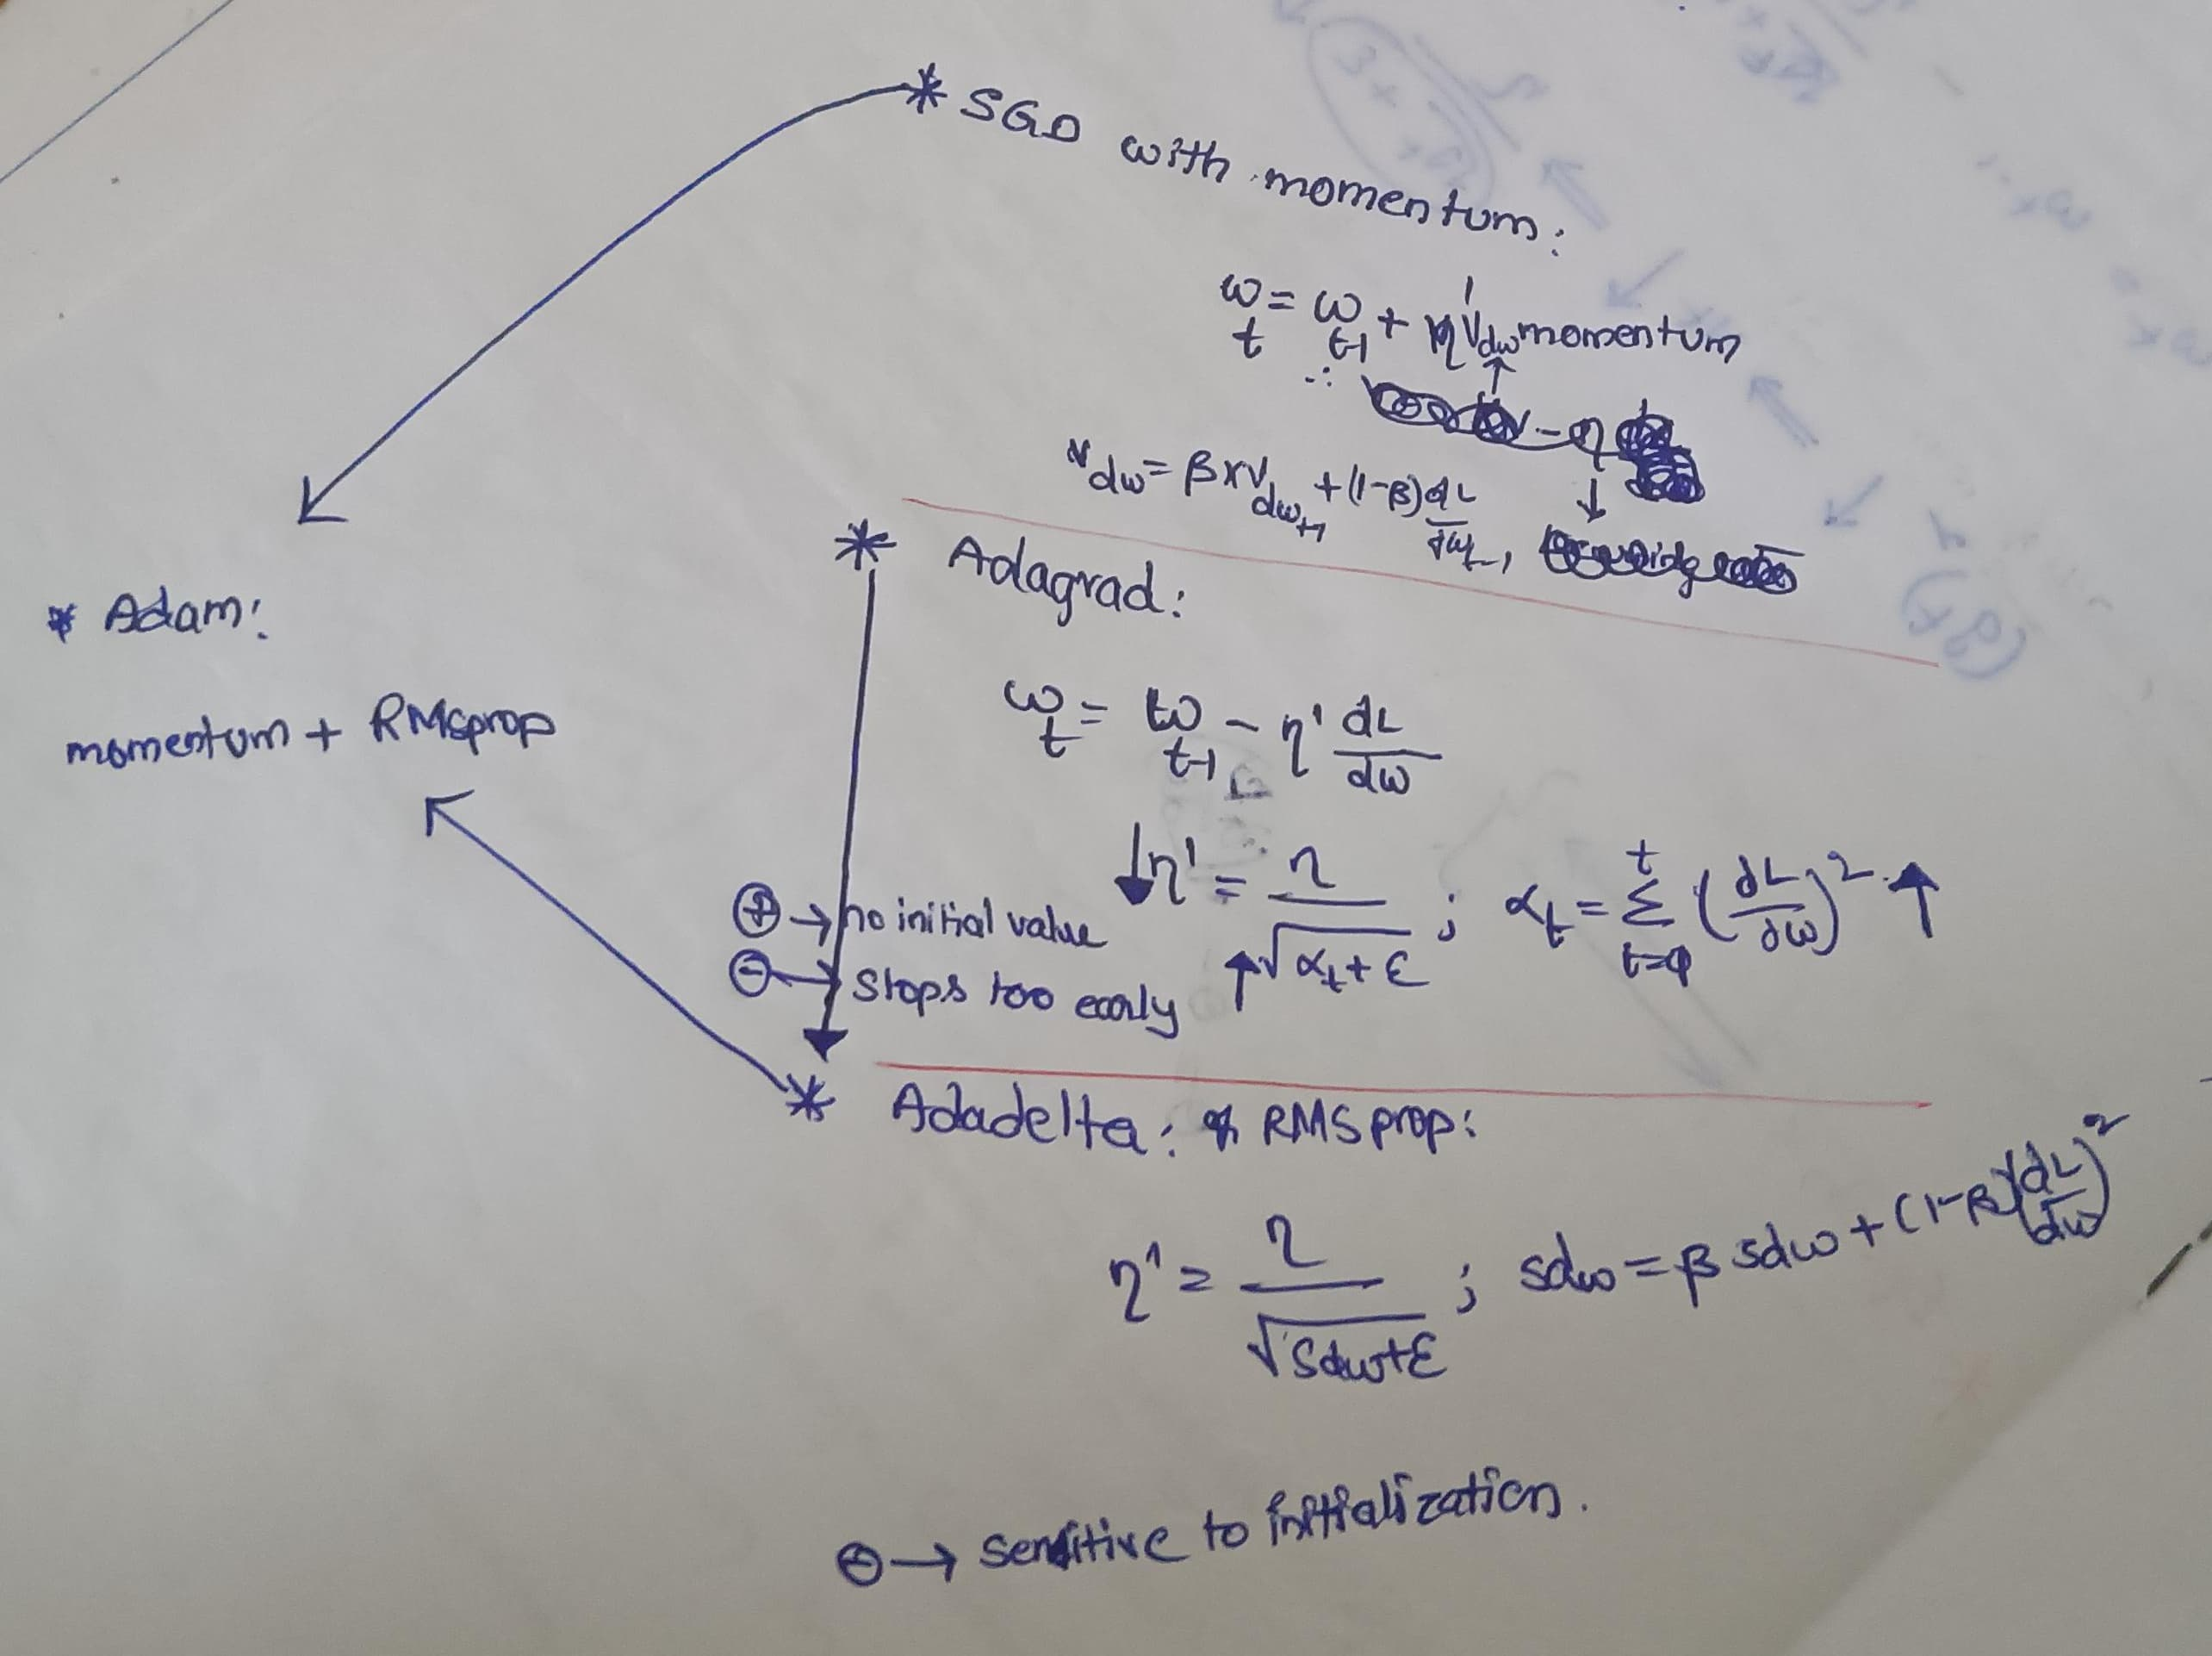

| Optimizer | Where It's Used | Update Strategy | Advantages | Disadvantages |
|-----------|-----------------|-----------------|------------|---------------|
| Batch Gradient Descent | • Small to medium datasets<br>• Problems requiring high accuracy<br>• When computational efficiency is not a primary concern<br>• Offline learning scenarios | • Computes gradient using entire dataset<br>• Updates parameters once per epoch<br>• θ = θ - η * ∇J(θ)<br>• Fixed learning rate η | • Stable and predictable convergence<br>• Accurate gradient estimation<br>• Easier to parallelize<br>• Guaranteed convergence to global minimum for convex problems | • Very slow for large datasets<br>• High memory requirements<br>• Can get stuck in local minima for non-convex problems<br>• Computationally expensive per update |
| Stochastic Gradient Descent (SGD) | • Large datasets<br>• Online learning scenarios<br>• When quick iterations are needed<br>• Problems with redundant examples | • Computes gradient using a single example<br>• Updates parameters after each example<br>• θ = θ - η * ∇J(θ; x(i), y(i))<br>• Can use a decaying learning rate | • Fast iterations<br>• Low memory requirements<br>• Can escape local minima<br>• Suitable for online learning | • High variance in parameter updates<br>• Requires many iterations to converge<br>• May not reach the exact minimum<br>• Sensitive to feature scaling |
| Mini-batch Gradient Descent | • Most common in deep learning<br>• Large datasets<br>• When balance between speed and accuracy is needed<br>• GPU-accelerated computing | • Computes gradient using a small batch of examples<br>• Updates parameters after each mini-batch<br>• θ = θ - η * ∇J(θ; x(i:i+n), y(i:i+n))<br>• Typically uses a fixed learning rate | • Good balance between accuracy and speed<br>• Reduces variance in parameter updates<br>• Allows for efficient use of matrix optimizations<br>• Can make use of GPU acceleration | • Still requires tuning of learning rate<br>• May struggle with very small datasets<br>• Can still get trapped in local minima<br>• Sensitive to batch size selection |
| Momentum | • Problems with small, frequent features<br>• When SGD oscillates<br>• Deep neural networks<br>• RNNs and LSTMs | • Accumulates a velocity vector<br>• v = γv - η∇J(θ)<br>• θ = θ + v<br>• Uses momentum coefficient γ | • Faster convergence<br>• Reduces oscillations in SGD<br>• Can overcome local minima and saddle points<br>• Works well with RNNs | • Can overshoot the minimum<br>• Introduces an additional hyperparameter (momentum)<br>• May perform poorly with sparse data<br>• Can accumulate too much momentum in wrong directions |
| Adagrad | • Sparse data problems<br>• Natural language processing<br>• Computer vision tasks<br>• When features have different scales | • Adapts learning rate for each parameter<br>• Accumulates squared gradients<br>• θ(t+1) = θ(t) - η / √(G(t) + ε) * g(t)<br>• G(t) is the sum of squares of past gradients | • Eliminates manual tuning of learning rate<br>• Works well with sparse data<br>• Automatically adapts to feature importance<br>• Improves convergence in problems with varying feature scales | • Aggressive, monotonically decreasing learning rate<br>• May stop learning too early<br>• Accumulation of squared gradients in denominator<br>• Not suitable for non-convex optimization in deep learning |
| Adadelta | • General purpose optimizer<br>• Deep neural networks<br>• When learning rate tuning is difficult<br>• Non-convex optimization problems | • Adapts learning rates based on a moving window of gradient updates<br>• Uses RMS of parameter updates<br>• Δθ(t) = -RMS[Δθ](t-1) / RMS[g](t) * g(t)<br>• θ(t+1) = θ(t) + Δθ(t) | • No need to set a default learning rate<br>• Robust to large gradients, noise and architecture choices<br>• Automatically adapts learning rate<br>• Theoretically solves Adagrad's decreasing learning rate problem | • May be slower than other adaptive methods in some cases<br>• Can have trouble making progress on deep networks<br>• Sensitive to initial conditions<br>• May perform poorly in online learning scenarios |
| RMSprop | • Non-stationary problems<br>• Online learning scenarios<br>• When Adagrad learns too slowly<br>• Classification tasks | • Utilizes a moving average of squared gradients<br>• E[g²](t) = 0.9E[g²](t-1) + 0.1g(t)²<br>• θ(t+1) = θ(t) - η / √(E[g²](t) + ε) * g(t)<br>• Adapts the learning rate for each parameter | • Prevents the learning rate from becoming infinitesimally small<br>• Works well in online and non-stationary settings<br>• Faster convergence compared to standard SGD<br>• Good performance on sparse data | • Still requires setting a global learning rate<br>• Can suffer from slowing down at the end of training<br>• May have trouble on some optimization landscapes<br>• Sensitive to initialization of accumulator |
| Adam | • Deep learning models<br>• Computer vision tasks<br>• Natural language processing<br>• Generative models (GANs) | • Combines ideas from momentum and RMSprop<br>• Maintains both a moving average of gradients and squared gradients<br>• m(t) = β1m(t-1) + (1-β1)g(t)<br>• v(t) = β2v(t-1) + (1-β2)g(t)²<br>• θ(t+1) = θ(t) - η * m̂(t) / (√v̂(t) + ε) | • Adaptive learning rates for each parameter<br>• Combines benefits of Momentum and RMSprop<br>• Bias correction helps in the initial stages of training<br>• Works well in practice for many problems | • Can converge to a suboptimal solution in some cases<br>• May have high memory requirements<br>• Learning rate still requires tuning for some problems<br>• Can be outperformed by SGD in some cases |

Note: η represents the learning rate, θ represents the parameters, and g represents the gradient. The exact implementation and performance of these optimizers can vary depending on the specific problem, dataset, and model architecture.

Here’s an updated table with tasks adjusted based on the number of independent features and data size:

| Scenario                    | Task                          | Recommended Activation Function | Loss Function                 | Optimizer                   |
|-----------------------------|-------------------------------|---------------------------------|-------------------------------|-----------------------------|
| **More independent features**| Regression                    | None / ReLU                     | Mean Squared Error (MSE)       | Adam, RMSprop               |
| **Less independent features**| Regression                    | None / ReLU                     | Mean Squared Error (MSE)       | Adam, SGD                   |
| **Large dataset**            | Binary Classification         | Sigmoid                         | Binary Cross-Entropy           | Adam, RMSprop               |
| **Small dataset**            | Binary Classification         | Sigmoid                         | Binary Cross-Entropy           | Adam, SGD                   |
| **More independent features**| Multiclass Classification     | Softmax                         | Categorical Cross-Entropy      | Adam, RMSprop               |
| **Less independent features**| Multiclass Classification     | Softmax                         | Categorical Cross-Entropy      | Adam, SGD                   |
| **Large dataset**            | Deep Learning (CNNs, RNNs)    | ReLU                            | Cross-Entropy                  | Adam, RMSprop               |
| **Small dataset**            | Deep Learning (CNNs, RNNs)    | ReLU                            | Cross-Entropy                  | Adam, SGD                   |



In practice, standard ReLU is often chosen unless the model experiences vanishing gradients or dead neurons, in which case Leaky ReLU or other alternatives (like ELU or SELU) might be considered. So, the choice often depends on the specific network and dataset.

 key **deep learning** (DL) terms related to training and regularization, excluding activation functions, loss functions, and optimizers:

| **Term**                     | **Definition**                                                                 | **Commonly Asked Questions**                                                                 | **Key Concepts**                                                                                |
|------------------------------|---------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|
| **Backpropagation**           | Algorithm to compute gradients of the loss function w.r.t. each weight by using the chain rule. | - Explain backpropagation in training.<br>- How does backpropagation work with gradient descent? | Chain rule, weight updates, error propagation, gradient calculation                             |
| **Gradient Descent**          | Optimization algorithm that minimizes the loss function by updating weights in the direction of the negative gradient. | - What’s the difference between Batch, Mini-batch, and Stochastic Gradient Descent?<br>- How does learning rate affect GD? | Weight update rules, learning rate, convergence, step size                                      |
| **Learning Rate**             | Step size used for updating weights during gradient descent.                    | - What happens if the learning rate is too high or too low?<br>- What’s a learning rate schedule? | Convergence speed, learning rate schedule, adaptive learning rates (e.g., in Adam)               |
| **Epochs**                    | One full pass through the entire training dataset.                              | - How many epochs should be used?<br>- What are the consequences of too few or too many epochs? | Overfitting risk, underfitting, validation performance                                           |
| **Batch Size**                | Number of training examples processed before updating model parameters.         | - How does batch size affect performance?<br>- Trade-offs between small and large batch sizes? | Mini-batch vs full batch, memory consumption, noise in gradients, computational efficiency       |
| **Regularization**            | Techniques to prevent overfitting by adding a penalty to the model complexity.  | - Explain L1 and L2 regularization.<br>- What’s the role of dropout?<br>- How do these methods prevent overfitting? | L1/L2 regularization (Ridge, Lasso), weight decay, dropout, overfitting prevention               |
| **Dropout**                   | Regularization technique that randomly drops units during training to prevent overfitting. | - How does dropout help?<br>- What’s the effect of dropout rate on performance?               | Random neuron deactivation, overfitting control, dropout rate tuning                             |
| **Batch Normalization**       | Technique to normalize activations during training, stabilizing the learning process. | - Why is batch normalization important?<br>- How does it help training?<br>- When to apply?   | Internal covariate shift, faster convergence, normalization layers                               |
| **Early Stopping**            | Technique to stop training when the validation error starts increasing, to prevent overfitting. | - How does early stopping prevent overfitting?<br>- How to determine when to stop training?   | Validation performance, generalization, overfitting avoidance                                   |
| **Vanishing/Exploding Gradients** | Gradients become too small (vanishing) or too large (exploding) during backpropagation, causing issues in training deep networks. | - What causes vanishing/exploding gradients?<br>- How can these issues be solved (e.g., ReLU, gradient clipping)? | Deep network training, ReLU for vanishing gradients, gradient clipping for exploding gradients   |
| **Hyperparameter Tuning**     | Process of selecting the best hyperparameters (e.g., learning rate, batch size) to optimize model performance. | - How do you tune hyperparameters?<br>- What’s the difference between grid search and random search? | Grid search, random search, Bayesian optimization, hyperparameter ranges                         |
| **Overfitting and Underfitting** | **Overfitting**: Model performs well on training data but poorly on unseen data.<br>**Underfitting**: Model performs poorly on both training and unseen data. | - How do you detect overfitting?<br>- What methods can you use to mitigate it?                | Bias-variance tradeoff, generalization, cross-validation, regularization methods                  |
| **Weight Initialization**     | Strategy for setting the initial values of the weights before training starts.  | - How do different initialization methods affect training?<br>- What’s the Xavier/He initialization? | Xavier initialization, He initialization, convergence speed, symmetry breaking                   |

 

---
---

### why bais is there in parameters?

In neural networks, **bias** is an important parameter that plays a crucial role alongside weights in determining the output of a neuron. Here's when and why to use bias:

### When to Use Bias
1. **Every Neuron**: 
   - In most architectures, each neuron (or unit) in a layer should have an associated bias. This is true for fully connected layers, convolutional layers, and recurrent layers. 
   - The bias allows the activation function to shift to the left or right, which enables the model to better fit the training data.

2. **Non-Linearity**:
   - Bias is particularly important when using non-linear activation functions (like ReLU, Sigmoid, Tanh, etc.). Without bias, the output of the activation function might be constrained to a specific range, making it harder for the model to learn complex patterns.

3. **Learning Complex Functions**:
   - Bias helps the model learn more complex functions. For example, if you consider a linear model \(y = wx + b\), the weight \(w\) determines the slope, while the bias \(b\) allows the model to fit data that doesn't necessarily pass through the origin.

### When Not to Use Bias
1. **Certain Architectures**:
   - Some specific architectures or configurations might not use bias, such as:
     - **Output Layer of Some Models**: For example, in some cases, particularly when performing regression tasks, the output layer might not use bias if the problem is strictly linear and passes through the origin.
     - **Normalization Layers**: In some cases where normalization layers like Batch Normalization are applied, the bias might be redundant since normalization adjusts the output mean and variance.

2. **Zero Initialization**:
   - When initializing weights, biases are often initialized to zero, but for some specific architectures, especially those using techniques like Layer Normalization or Batch Normalization, you may decide to omit bias to avoid redundancy.

### Summary
- **Bias is generally essential** for neural networks as it allows for flexibility in the model and enhances its capacity to learn from the data.
- **In most scenarios**, it is advisable to include bias in each layer, especially in fully connected and convolutional layers, to achieve better learning performance. 

Overall, while weights are crucial for determining the relationships between inputs and outputs, bias enables the model to have a more adaptable and complex decision boundary.

---
---

what is exponential weighted avg?

---
---